In [273]:
import numpy as np
import pandas as pd
import math
import matplotlib.image as image
from matplotlib import artist
import matplotlib.patches as mpatches
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']
#from matplotlib.offsetbox import OffsetImage, AnnotationBb
import matplotlib.font_manager as fm
font = fm.FontProperties(fname=r"C:\Users\YahyaRashwan\Desktop\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf")

In [274]:
df = pd.read_csv(r"C:\Users\YahyaRashwan\Downloads\2021-2022 Premier League Stats - Sheet1.csv")
df["Path"] = df.Squad + ".png"
df

,Rk,Squad,GF,GA,Path
0,1,Manchester City,99,26,Manchester City.png
1,2,Liverpool,94,26,Liverpool.png
2,3,Chelsea,76,33,Chelsea.png
3,4,Tottenham,69,40,Tottenham.png
4,5,Arsenal,61,48,Arsenal.png
5,6,Manchester Utd,57,57,Manchester Utd.png
6,7,West Ham,60,51,West Ham.png
7,8,Leicester City,62,59,Leicester City.png
8,9,Brighton,42,44,Brighton.png
9,10,Wolves,38,43,Wolves.png


In [275]:
y = "GF"
x = "GA"

In [276]:
x1 = list(df[x])
y1 = list(df[y])
n1 = list(df['Squad'])


In [277]:
x_mean = np.mean(df[x])
y_mean = np.mean(df[y])

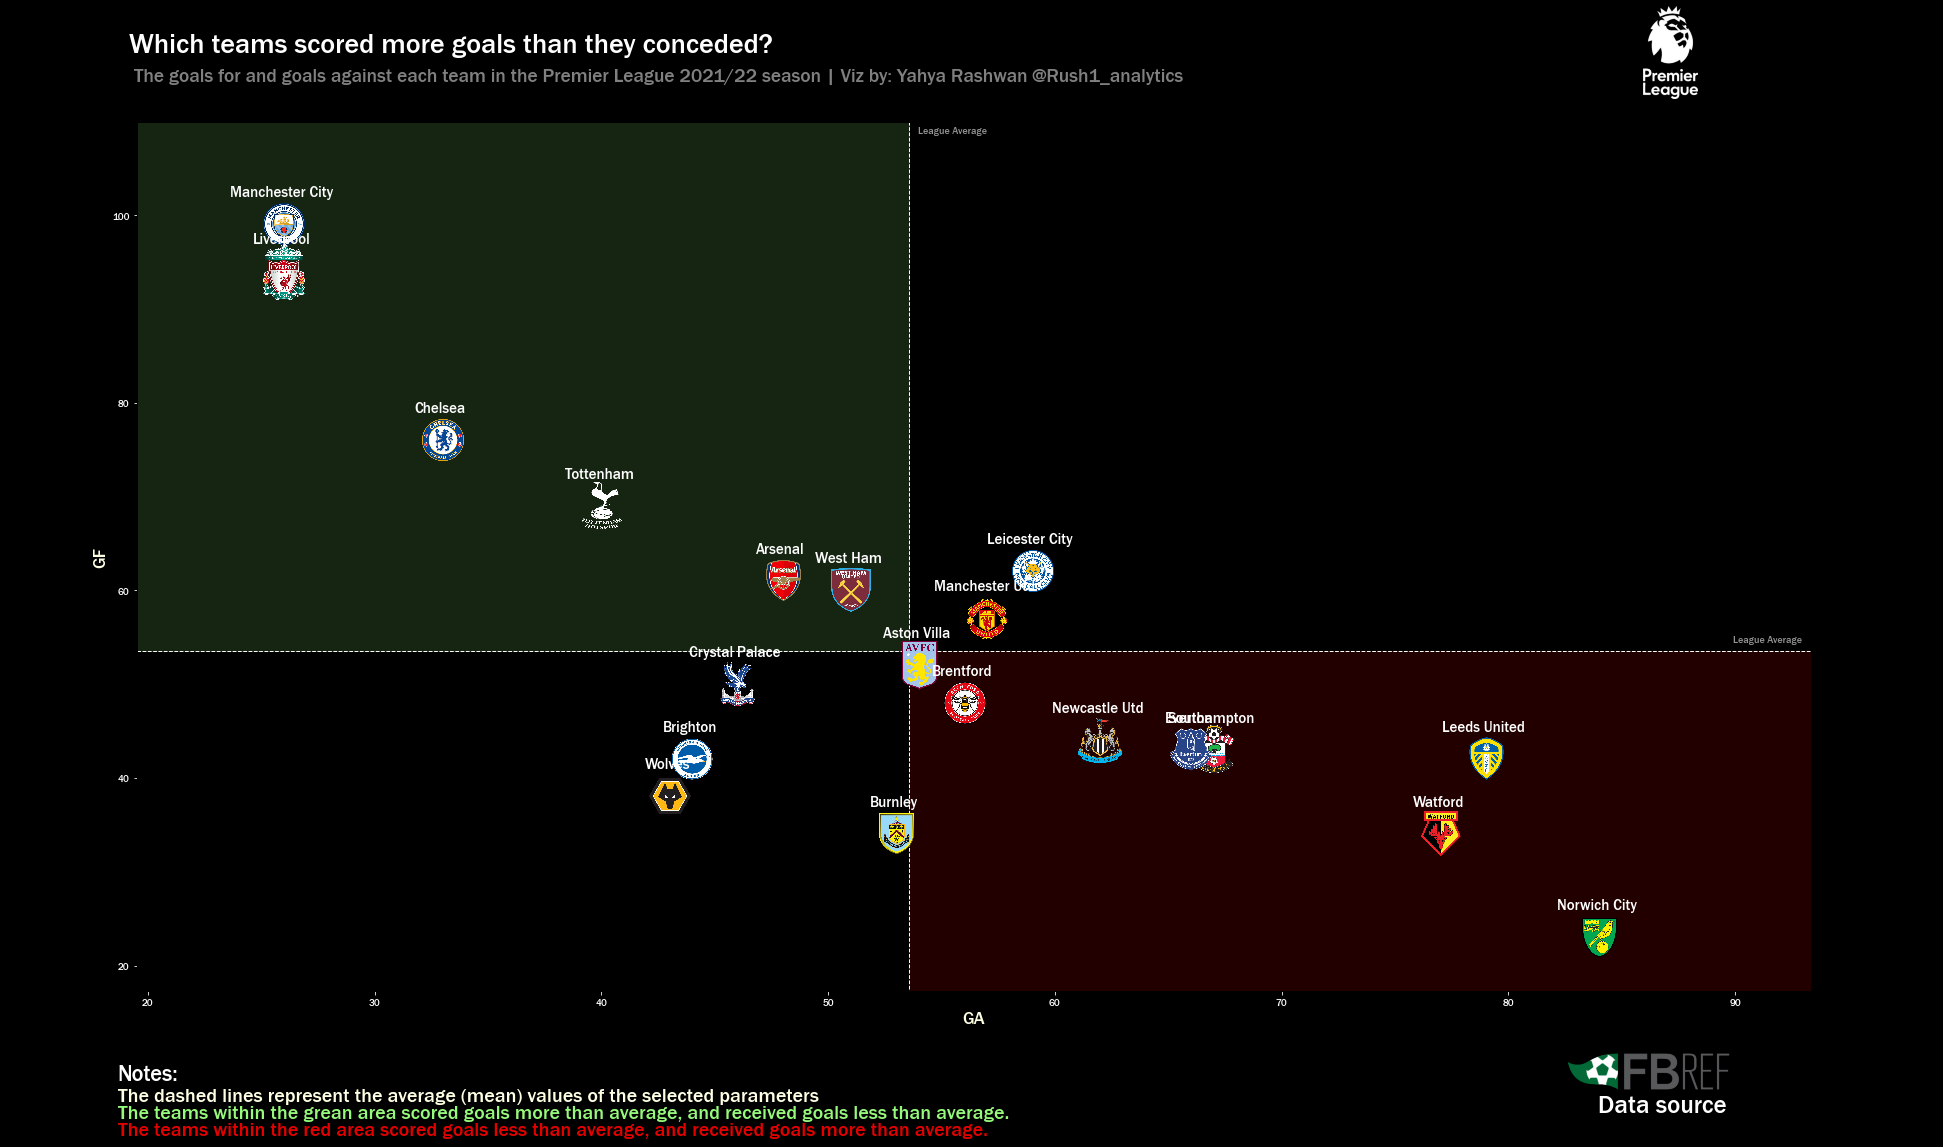

In [282]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig,ax= plt.subplots(figsize=(6*5,4*4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.grid(False)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.tick_params(axis='x', colors='xkcd:white')
ax.tick_params(axis='y', colors='xkcd:white')

plt.text(1.075,0.5,"\n", horizontalalignment='right', verticalalignment='top', color='xkcd:off white', size='18', transform=ax.transAxes)

xlimval = max(x1)*1.01
ylimval = max(y1)*1.01
plt.xlim(min(x1)*0.75, xlimval*1.1)
plt.ylim(min(y1)*0.75, ylimval*1.1)

ax.scatter(x=x1,y=y1,s=1, color='#6cabdd', zorder=-1)

# Creating and labelling average lines
plt.axhline(y=y_mean, xmin =-100, xmax=100, color='xkcd:white', linestyle='--', linewidth=1)
plt.axvline(x=x_mean, ymin=-100,ymax=100, color='xkcd:white', linestyle = '--', linewidth=1, zorder=0.2)
plt.text(x_mean/xlimval*0.805,0.995,'League Average', horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)
plt.text(0.995,y_mean/ylimval*0.765,'League Average', horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)
ax.fill_between([0,x_mean],  y_mean,ylimval*1.5, alpha=0.15, color='xkcd:light green', zorder=-2)
ax.fill_between([x_mean,150],  0,y_mean, alpha=0.15, color='xkcd:red', zorder=-2)

# Adding graph and axes titles
ax.set_xlabel('{}'.format(x), color='xkcd:off white', size = 18)
ax.set_ylabel('{}'.format(y), color='xkcd:off white', size = 18)

for i in n1:
    plt.annotate(i, (x1[n1.index(i)]-0.1, y1[n1.index(i)]+3), color='white',horizontalalignment='center', fontsize=15, zorder=100)

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=0.115, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row["Path"]), (row[x], row[y]), frameon=False)
    ax.add_artist(ab)

Logo = fig.add_axes((0.765,0.035,0.12,0.04))
Logo.axis('off')
Logo.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\idXc7lyQtc.png")
Logo.imshow(im)
Logo.set_facecolor('black')
Logo.grid(False)

Logo2 = fig.add_axes((0.775,0.9,0.12,0.08))
Logo2.axis('off')
Logo2.set_zorder(90000)
im = plt.imread(rf"C:\Users\YahyaRashwan\Desktop\GB1.png")
Logo2.imshow(im)
Logo2.set_facecolor('white')
Logo2.grid(False)

Header = fig.add_axes((0.0825,0.8875,0.12*7.25,0.04*1.75))
Header.axis('on')
Header.set_zorder(-1)
Header.set_facecolor('black')
Header.grid(False)

Header.text(s="Which teams scored more goals than they conceded?",x=0.045,y=0.75,zorder=90,color='white',fontsize=22.5*1.25)
Header.text(s="The goals for and goals against each team in the Premier League 2021/22 season | Viz by: Yahya Rashwan @Rush1_analytics",x=0.0475,y=0.4,zorder=90,color='grey',fontsize=15*1.3)

Footer = fig.add_axes((0.075,0.01,0.12*7.25,0.04*1.25))
Footer.axis('on')
Footer.set_zorder(9)
Footer.set_facecolor('black')
Footer.grid(False)
Footer.text(s="Notes:",x=0.0475,y=0.75,zorder=90,color='white',fontsize=22.5)
Footer.text(s="The dashed lines represent the average (mean) values of the selected parameters",x=0.0475,y=0.4,zorder=90,color='xkcd:off white',fontsize=20)
Footer.text(s="The teams within the grean area scored goals more than average, and received goals less than average.",x=0.0475,y=0.1,zorder=90,color='xkcd:light green',fontsize=20)
Footer.text(s="The teams within the red area scored goals less than average, and received goals more than average.",x=0.0475,y=-0.2,zorder=90,color='xkcd:red',fontsize=20)
Footer.text(s="Data source",x=.835,y=0.2,color='white',zorder=1,fontsize=25)
fig.savefig("Plot2.png",dpi=300,bbox_inches="tight",facecolor="black")